In [1]:
%matplotlib inline

kNN classification, but you can't tell which features contribute most, so not that useful. 

(289, 63)
Original dataset shape Counter({'1.0': 217, '3.0': 42, '2.0': 30})
Resampled dataset shape Counter({'1.0': 30, '2.0': 30, '3.0': 30})


Text(0, 0.5, 'Testing Accuracy')

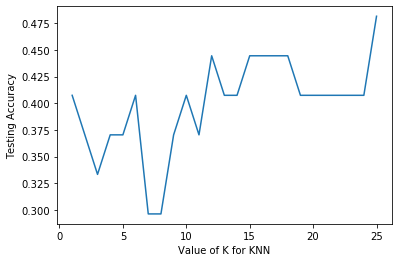

In [23]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import scale

data = pd.read_csv("april10dataNoNaN.csv", index_col=0)

npData = data.to_numpy()
print(np.shape(npData))

X = npData[:, 0:61]
# print(X[:,-1])
y = npData[:, 61]
# print(y)

y=y.astype('str')

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss 

print('Original dataset shape %s' % Counter(y))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


X_train, X_test, y_train, y_test =  train_test_split(X_res,y_res,test_size=0.3, random_state=4)

X_train_scaled = scale(X_res)
X_test_scaled = scale(X_res)

k_range = range(1,26)
scores = {}
scores_list = []


for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
#     print(k)
#     print(metrics.confusion_matrix(y_test, y_pred))
    
%matplotlib inline

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')




regression for DRTs 

In [26]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.calibration import calibration_curve
from sklearn import preprocessing

data = pd.read_csv("april10dataNoNaN.csv",
                  index_col=0)

npData = data.to_numpy()

X = npData[:, 2:61]
y = npData[:, 62]

y = y.astype('float64')

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.4, random_state=0)

from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.2)
reg.fit(X_train, y_train)
reg.predict(X_test)
print(i, reg.score(X_test,y_test))


NameError: name 'i' is not defined

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import tree

data = pd.read_csv("april10dataNoNaN.csv",
                  index_col=0)

labelsX = list(data.columns[0:61])
labelsy = list(data.columns[61:62])
classnames = ['1', '2', '3']

npData = data.to_numpy()

X = npData[:, 2:61]
y = npData[:, 32]
# y=y.astype('str')

X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3)

# normalize the inputs
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)


algorithm = tree.DecisionTreeClassifier(max_depth = 3)
model = algorithm.fit(X_train_scaled, y_train)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
tree.plot_tree(model,
               feature_names = labelsX, 
               class_names= classnames,
               filled = True);

# r = tree.export_text(algorithm, feature_names=labelsX)
# print(r)


ValueError: Unknown label type: 'continuous'